In [12]:
import pandas as pd

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')


In [17]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Create a crosstab between the product category and the isBestSeller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate the proportion of best-sellers for each category
crosstab['proportion'] = crosstab[True] / (crosstab[False] + crosstab[True])

# Sort the categories based on the proportion of best-sellers in descending order
sorted_crosstab = crosstab.sort_values('proportion', ascending=False)

sorted_crosstab


isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [19]:


# Conducting Chi-square test on the adjusted data
chi2_adjusted, p_adjusted, dof_adjusted, expected_adjusted = chi2_contingency(sorted_crosstab)

# Recalculating Cramér's V for the adjusted data
n_adjusted = sum(sorted_crosstab.sum())  # Total observations for adjusted data
phi2_adjusted = chi2_adjusted / n_adjusted
r_adjusted, k_adjusted = sorted_crosstab.shape
phi2_corr_adjusted = max(0, phi2_adjusted - ((k_adjusted-1)*(r_adjusted-1))/(n_adjusted-1))  # Corrected phi2 for bias
r_corr_adjusted = r_adjusted - ((r_adjusted-1)**2)/(n_adjusted-1)  # Corrected degrees of freedom for rows
k_corr_adjusted = k_adjusted - ((k_adjusted-1)**2)/(n_adjusted-1)  # Corrected degrees of freedom for columns

if min((k_corr_adjusted-1), (r_corr_adjusted-1)) > 0:
    cramers_v_adjusted = np.sqrt(phi2_corr_adjusted / min((k_corr_adjusted-1), (r_corr_adjusted-1)))
else:
    cramers_v_adjusted = 0  # Assigning a value of 0 if the denominator would result in division by zero

chi2_adjusted, p_adjusted, dof_adjusted, cramers_v_adjusted


(36684.23786636857, 0.0, 590, 0.0859378262400017)

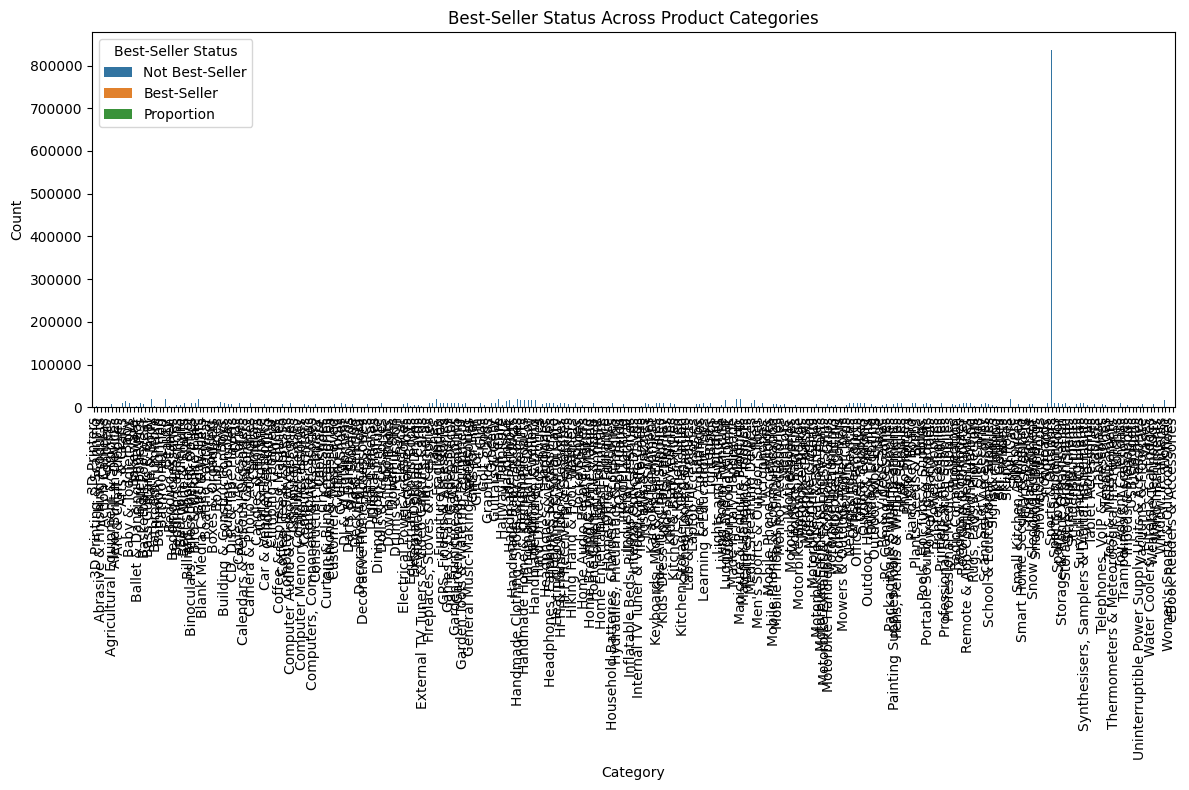

(isBestSeller                      False  True  Proportion
 category                                                 
 Grocery                            9008   556    0.058135
 Smart Home Security & Lighting       98     6    0.057692
 Health & Personal Care             9017   552    0.057686
 Mobile Phone Accessories            248    11    0.042471
 Power & Hand Tools                 8353   306    0.035339
 ...                                 ...   ...         ...
 CD, Disc & Tape Players            8798     0    0.000000
 General Music-Making Accessories    259     0    0.000000
 Snowboard Boots                    1449     0    0.000000
 Boxes & Organisers                  911     0    0.000000
 eBook Readers & Accessories         246     0    0.000000
 
 [296 rows x 3 columns],
 'Chi-square test p-value: 0.0',
 "Cramér's V: 0.0859378262400017")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

# Define a function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# Crosstab Analysis
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['Proportion'] = crosstab[True] / (crosstab[False] + crosstab[True])
sorted_crosstab = crosstab.sort_values('Proportion', ascending=False)

# Statistical Tests
chi2, p, dof, expected = chi2_contingency(crosstab)
cramers_v_value = cramers_v(crosstab)

# Visualizations
stacked = crosstab.stack().reset_index().rename(columns={0:'value'})
fig, ax = plt.subplots(figsize=(12, 8))
stacked['isBestSeller'] = stacked['isBestSeller'].replace({True: 'Best-Seller', False: 'Not Best-Seller'})
sns.barplot(x=stacked['category'], y=stacked['value'], hue=stacked['isBestSeller'])
plt.xticks(rotation=90)
plt.title('Best-Seller Status Across Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Best-Seller Status')
plt.tight_layout()

# Show the plot and print the statistical test results
plt.show()
(sorted_crosstab, f'Chi-square test p-value: {p}', f"Cramér's V: {cramers_v_value}")


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [23]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [29]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['Proportion'] = crosstab[True] / (crosstab[False] + crosstab[True])
sorted_crosstab = crosstab.sort_values('Proportion', ascending=False)
sorted_crosstab

isBestSeller,False,True,Proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [25]:
chi2, p, dof, expected = chi2_contingency(crosstab)
cramers_v_value = cramers_v(crosstab)

In [34]:
chi2, p, dof

(36684.23786636857, 0.0, 590)

In [35]:
cramers_v_value

0.0859378262400017

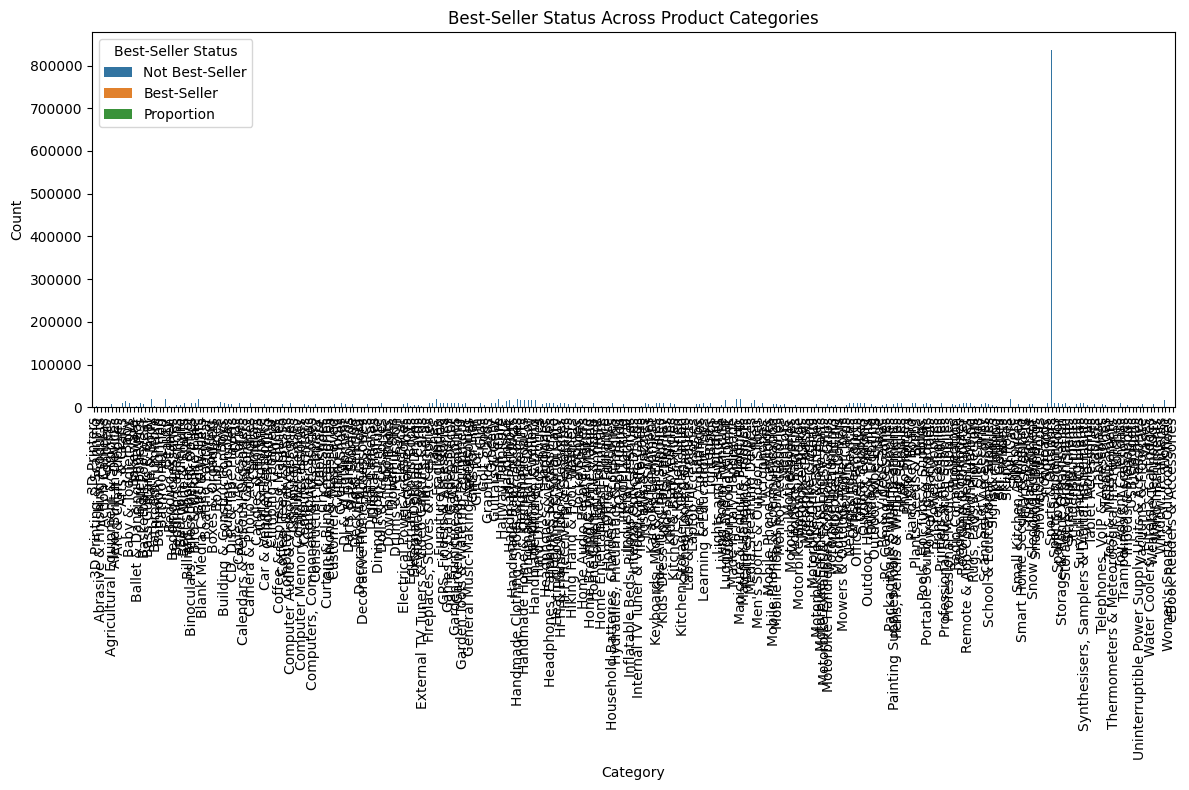

In [26]:
stacked = crosstab.stack().reset_index().rename(columns={0:'value'})
fig, ax = plt.subplots(figsize=(12, 8))
stacked['isBestSeller'] = stacked['isBestSeller'].replace({True: 'Best-Seller', False: 'Not Best-Seller'})
sns.barplot(x=stacked['category'], y=stacked['value'], hue=stacked['isBestSeller'])
plt.xticks(rotation=90)
plt.title('Best-Seller Status Across Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Best-Seller Status')
plt.tight_layout()

In [36]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [37]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the dataframe to remove price outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Showing the effect of outlier removal on dataset size for verification
original_size = df.shape[0]
no_outliers_size = df_no_outliers.shape[0]

original_size, no_outliers_size


(2443651, 2115963)

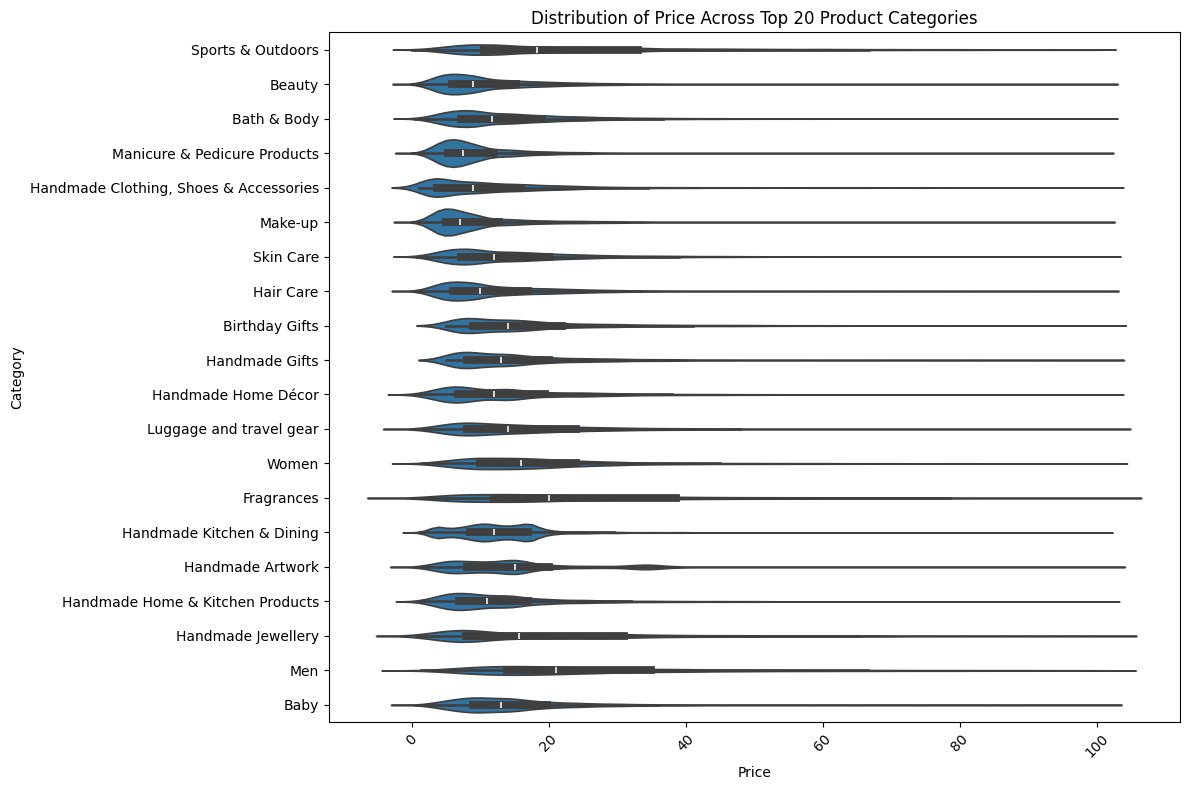

(None, 'Desktop PCs', 74.0)

In [38]:
# Filtering out the top 20 categories based on count for better visualization
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

df_top_20_categories = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='price', y='category', data=df_top_20_categories, order=top_20_categories)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Price')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Finding the category with the highest median price
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_price_category = median_prices.idxmax()
highest_median_price = median_prices.max()

plt.show(), highest_median_price_category, highest_median_price


In [39]:
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_price_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"The category with the highest median price is '{highest_median_price_category}' with a median price of {highest_median_price}.")


The category with the highest median price is 'Desktop PCs' with a median price of 74.0.


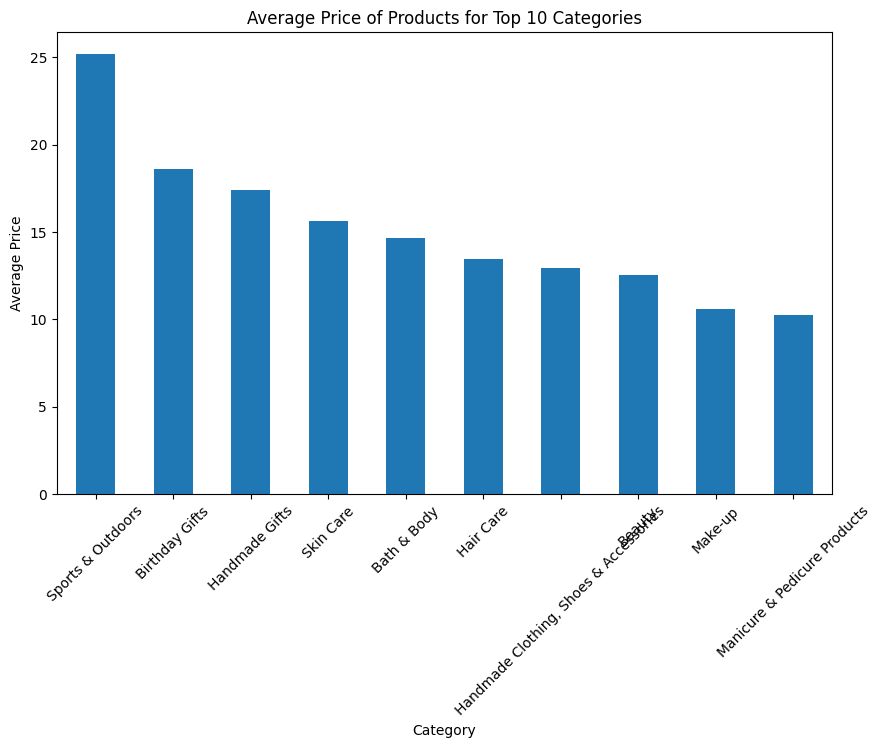

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

average_price_per_category = df_no_outliers.groupby('category')['price'].mean()

top_10_categories = df_no_outliers['category'].value_counts().head(10).index

average_prices_top_10 = average_price_per_category[top_10_categories].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_prices_top_10.plot(kind='bar')
plt.title('Average Price of Products for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


In [41]:
highest_avg_price_category = average_price_per_category.idxmax()
highest_avg_price = average_price_per_category.max()

print(f"The category with the highest average price is '{highest_avg_price_category}' with an average price of {highest_avg_price:.2f}.")


The category with the highest average price is 'Motherboards' with an average price of 68.77.


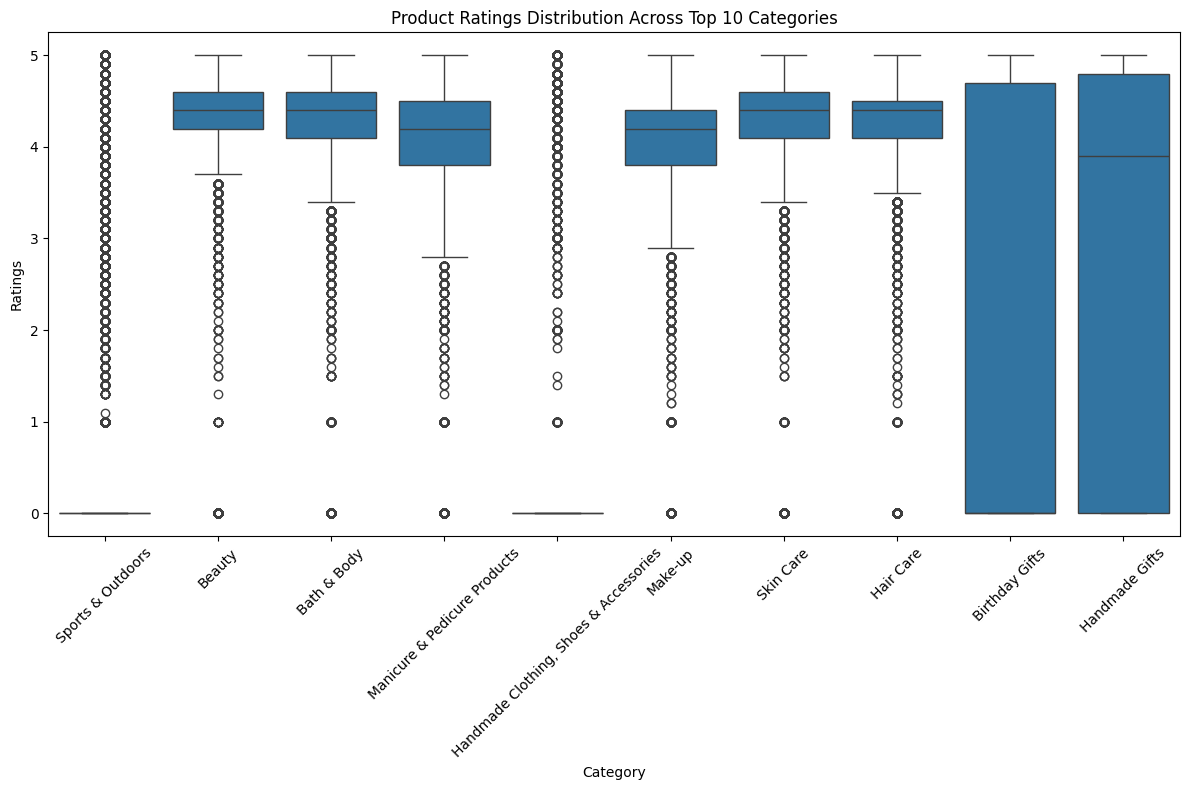

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the top 10 categories based on count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10, order=top_10_categories)
plt.title('Product Ratings Distribution Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"The category with the highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating}.")


The category with the highest median rating is 'Computer Memory' with a median rating of 4.7.


In [44]:
# Calculate the correlation between 'price' and 'stars'
correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])

print(f"The correlation coefficient between product price and rating is: {correlation_coefficient}")


The correlation coefficient between product price and rating is: -0.07767299878181323


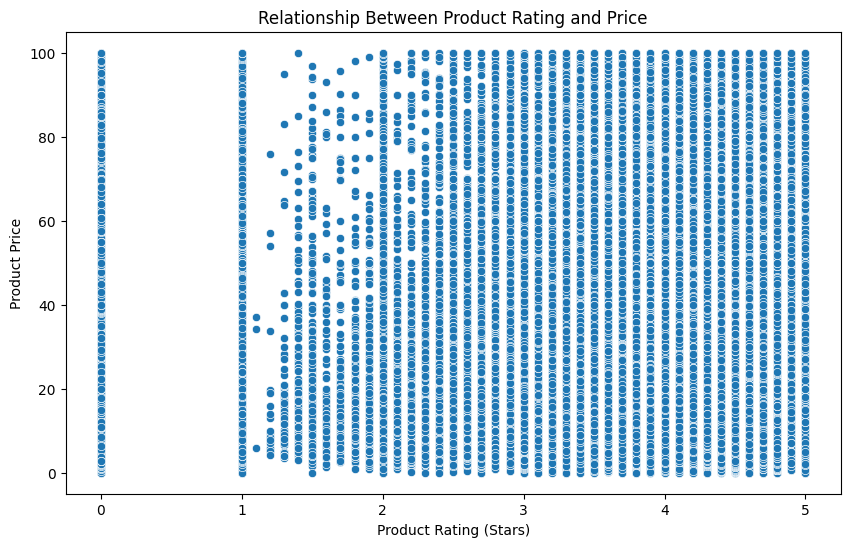

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df_no_outliers)
plt.title('Relationship Between Product Rating and Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Product Price')
plt.show()


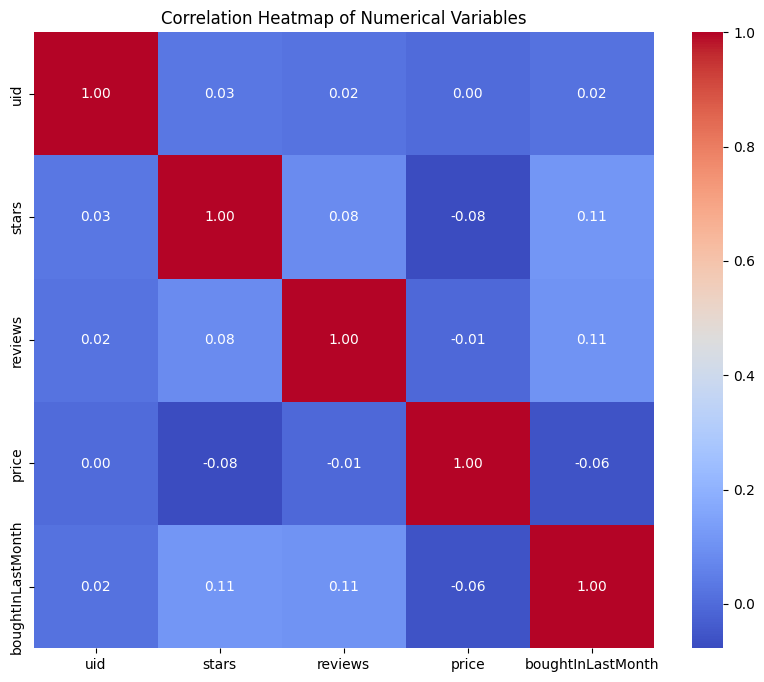

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eike and Victor asked me how to do this part
# maybe this was unclear to them
numerical_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


<Figure size 1000x600 with 0 Axes>

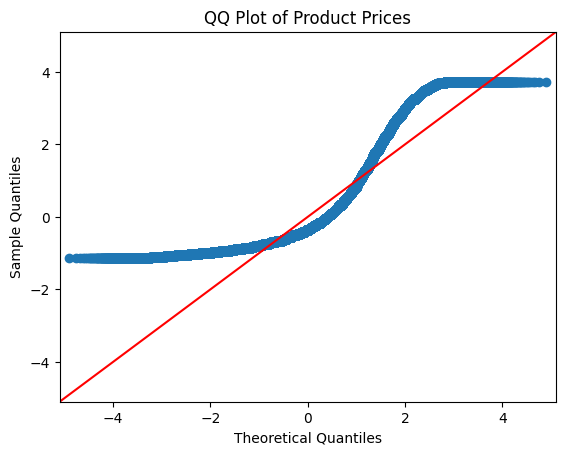

In [50]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(df_no_outliers['price'], line ='45', fit=True)
plt.title('QQ Plot of Product Prices')
plt.show()
